## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [7]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os
import missingno


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset
df = pd.read_csv("Country-data.csv")

In [5]:
# Check the shape
df.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [19]:
# Check datatypes & counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB
None


In [21]:
# Get descriptive statistics to provide an at-a-glance summary of the dataset
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000   

<Axes: >

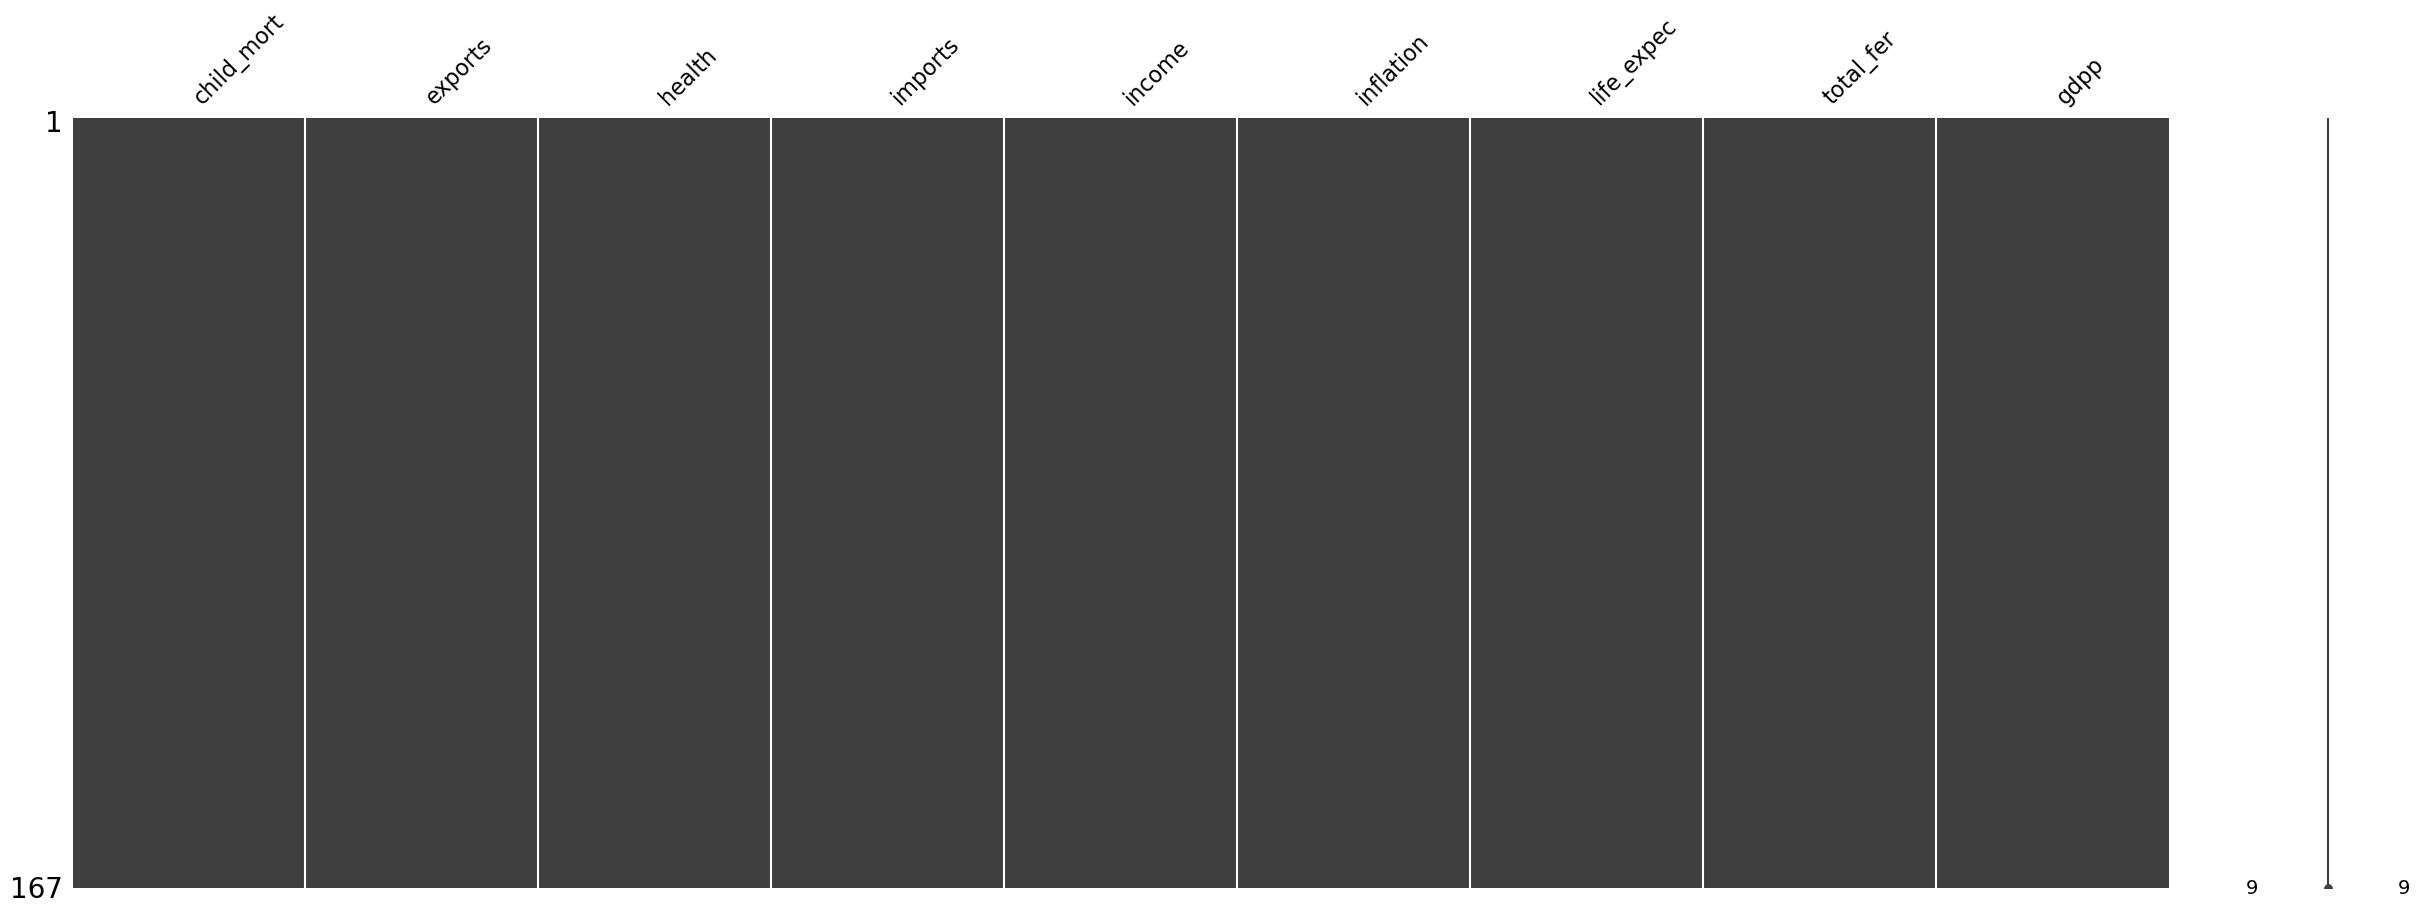

In [22]:
# Identify any missing data

# Get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first twelve columns
missing_values_count[0:12]

# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

## Preprocessing and Feature Selection

In [9]:
# Drop any non-numeric features (columns)
df.drop('country', axis = 1, inplace = True)
df.head

<bound method NDFrame.head of      child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1        

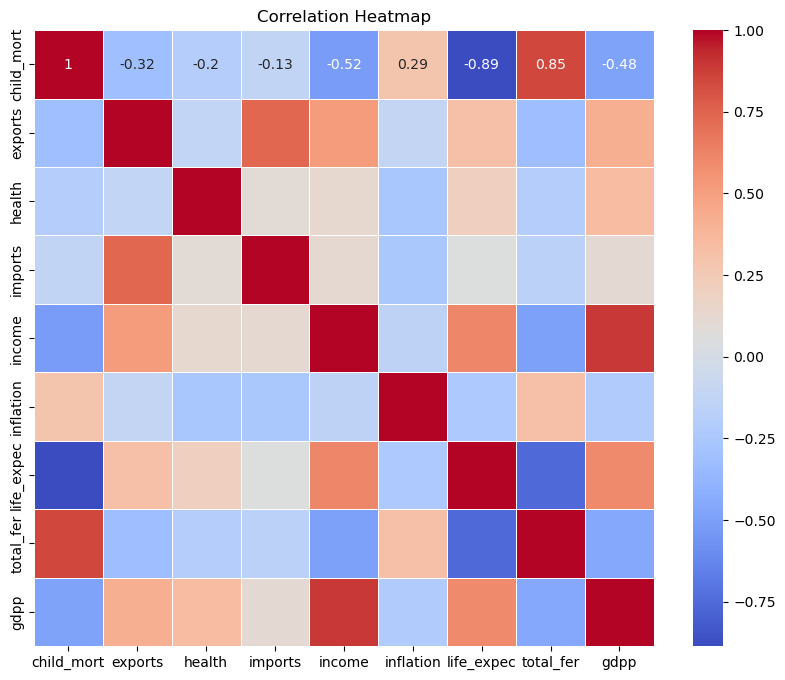

In [23]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This heatmap indicates that the following variables have a strong 
positive or negative correlation:
- gdpp and income (0.85): as GDP per capita increases, so does income
- life_expec and income (0.89): higher income generally equals higher life expectancy
- child_mort and life_expec (-0.89): as child mortality decreases, life expectancy increases
- total_fer and life_expec (-0.85): higher fertility rates are associated with lower life expectancy

In [ ]:
# Explore the continuous independent features against gdpp using scatter plots.

In [12]:
# Use for loop to iterate over column names, and create visualisation of each GDPP x variable
columns = df.columns.tolist()

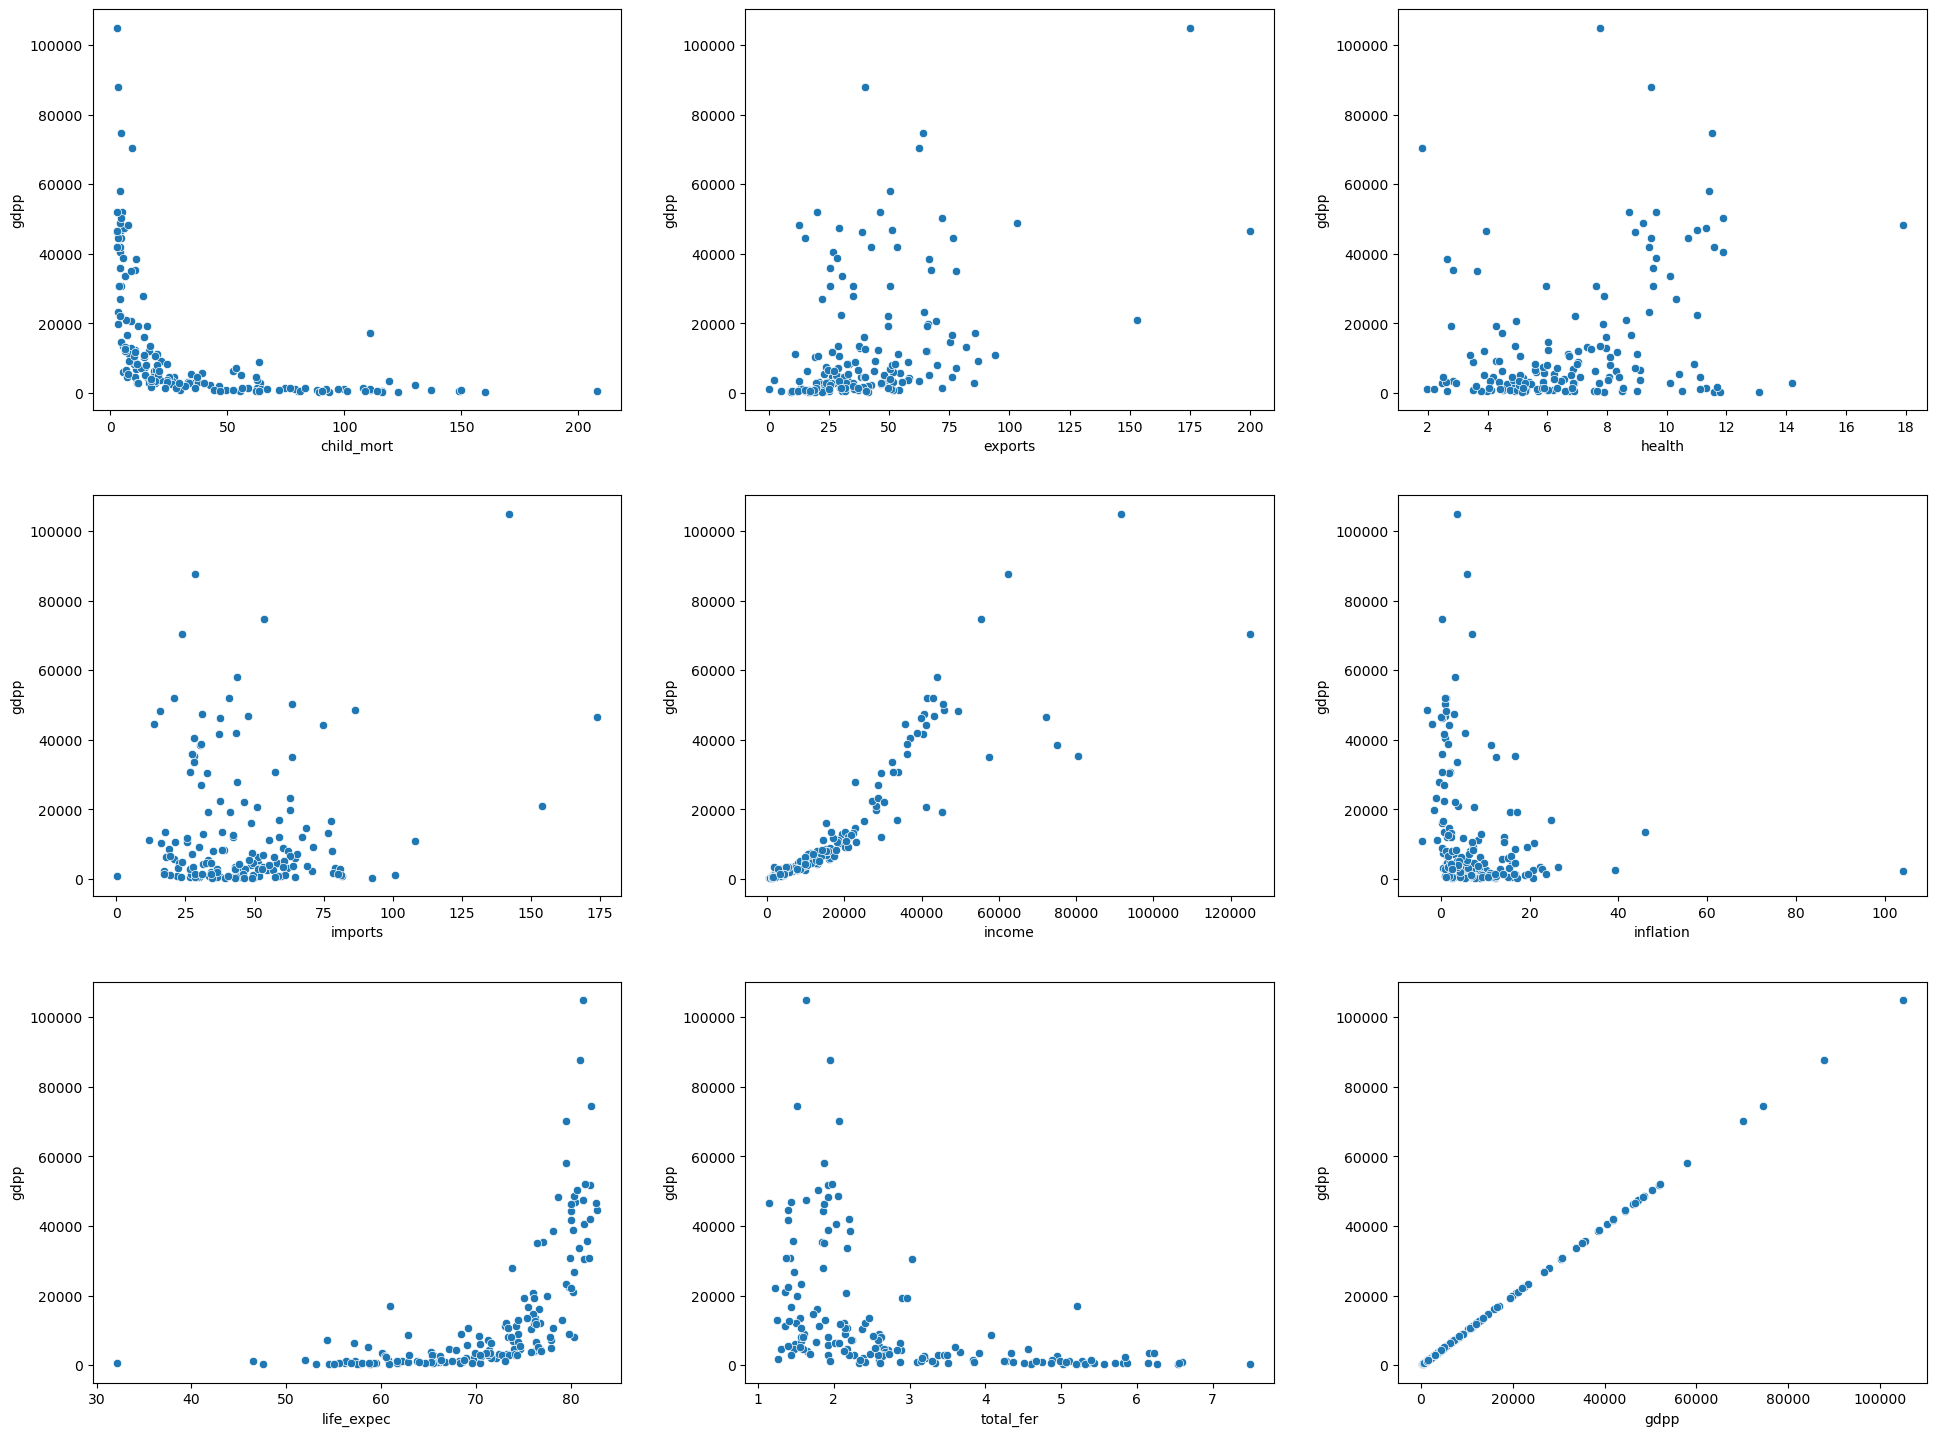

In [32]:
# Set up plotting space for sub-plots (8 scatterplots in total, 2 rows and 4 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the array in order to iterate over it (otherwise for loop won't work)
axes = axes.flatten()

# Grab column list entry and position (i = 0 and var = child_mort, and so on
for i, var in enumerate(columns):
    sns.scatterplot(ax = axes[i], x = df[var], y = df['gdpp'] ) # ax = telling where to put subplot within 9 positions
    
# Remove any unused sub-plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout to add more space between plots
plt.tight_layout(pad=3.0)
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

The middle plot seems to be the most promising for separating into clusters (the relationship between GDPP and Income). There is clear separation between datapoints, which suggests that different clusters of countries can be identified based on their income levels and GDP per capita.

### Scaling the Data

In [33]:
# Normalise the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Convert the normalised data back to a df
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows of the normalised DataFrame
print(df_scaled.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242  


## K-Means Clustering

### Selecting K

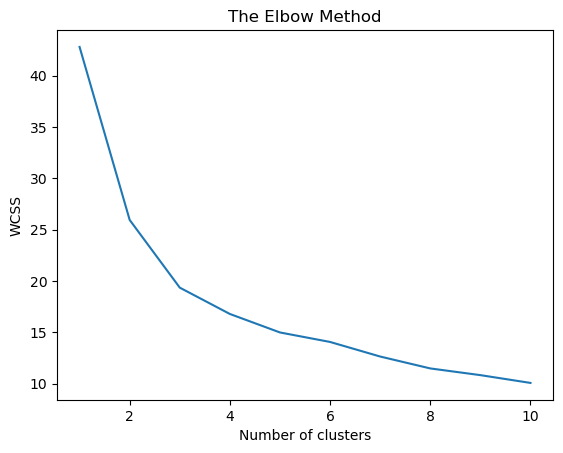

In [35]:
# Plot elbow curve

# Deciding number of custers
wcss = []

# For each n_clusters, i, get the inertia
for i in range(1,11): # 1 to 10 clusters
    kmeans = KMeans (n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# Visualise
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Where the graph bends (ie. the elbow) indicates the ideal number of clusters (ie. perhaps 2 or 3)

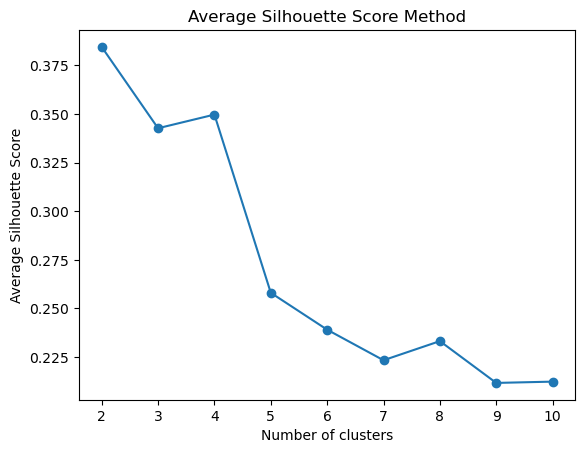

In [36]:
# Silhouette score method

silhouette_scores = []

# For each n_clusters, i, get the avg silhouette
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Visualise
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score Method')
plt.show()

Look for highest point/peak in the plot (ie. k=2); this agrees with our elbow plot above.

Based on the elbow and silhouette score method choose a value for K.

In [ ]:
# let k = 2

## Fitting a K-Means Model with the selected K value

In [42]:
# Optimal number of clusters = k

kmeans = KMeans(n_clusters = 2, random_state = 42) 
kmeans.fit(df_scaled)

# Get labels in order to get silhoutte score
labels = kmeans.labels_
score = silhouette_score(df_scaled, labels)
print("Silhouette Score: ", score)

Silhouette Score:  0.384471920619431


0.384 is not a great score; ideally we're looking for a value closer to 1

In [44]:
# Count the number of records in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Number of records in each cluster:\n", cluster_counts)

Number of records in each cluster:
 Cluster
0    116
1     51
Name: count, dtype: int64


In [45]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Silhouette Coefficient: 0.3845


## Predictions

In [ ]:
# Add the predicted cluster label column to the original dataframe

In [43]:
# Create df that has cluster assignments in a column for each observation
df = pd.DataFrame(df_scaled, columns=df.columns)

# Add another column with these cluster labels
df['Cluster'] = labels
print(df.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  Cluster  
0   0.736593  0.003073        1  
1   0.078864  0.036833        0  
2   0.274448  0.040365        0  
3   0.790221  0.031488        1  
4   0.154574  0.114242        0  


## Visualisation of clusters

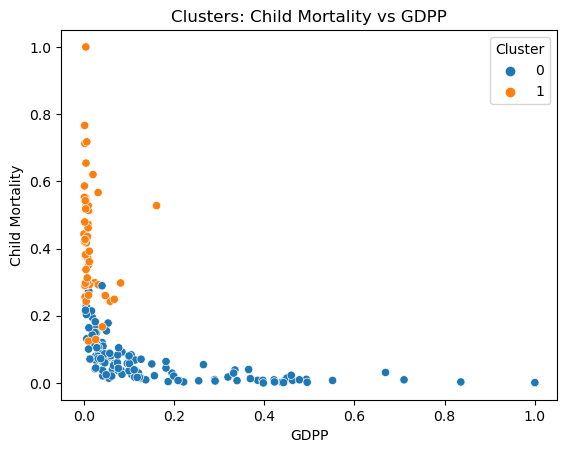

In [47]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(x=df['gdpp'], y=df['child_mort'], hue=df['Cluster'])
plt.title('Clusters: Child Mortality vs GDPP')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.show()

# Question for marker: Is it best to use original df or df_scaled when visualising?

Cluster 0 (blue): Countries with generally higher GDPP and lower Child Mortality. In other words, countries with higher GDP per capita tend to have lower child mortality rates.

Cluster 1 (orange): Countries with generally lower GDPP and higher Child Mortality. In other words, countries with lower GDP per capita tend to have higher child mortality rates.

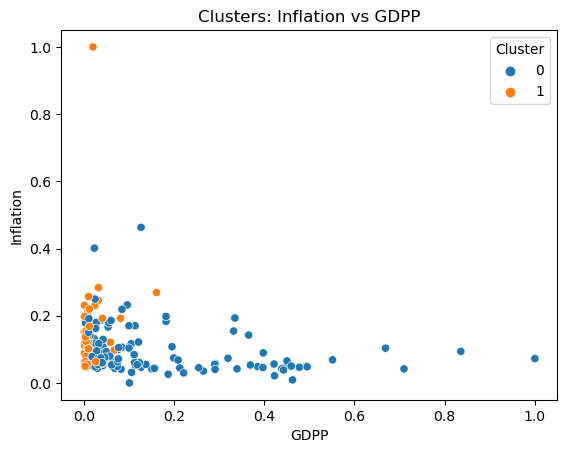

In [49]:
# Visualisation of clusters: inflation vs gdpp

sns.scatterplot(x=df['gdpp'], y=df['inflation'], hue=df['Cluster'])
plt.title('Clusters: Inflation vs GDPP')
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.show()
                     

Cluster 0 (blue): Countries with generally higher GDPP and low(ish) inflation. In other words, countries with higher GDP per capita tend to have lower (and perhaps more stable?) inflation rates.

Cluster 1 (orange): Countries with generally lower GDPP and high(ish) inflation. In other words, countries with lower GDP per capita tend to have higher inflation rates.

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

Cluster 0 (Blue): Higher income countries

- GDPP: Generally higher, which means better economic performance
- Child Mortality: Generally lower, which tells us the country tends to have better health overall.
- Inflation: Generally lower, which results in a more stable economy.

Cluster 1 (Orange): Lower income countries
- GDPP: Generally lower, which means slower/worse economic performance
- Child Mortality: Generally higher, which tells us overall health is poor
- Inflation: Generally higher, which tells us there could be economic instability

In [52]:
# Assign labels based on the clusters
def assign_label(cluster):
    if cluster == 0:
        return 'Higher income countries'
    else:
        return 'Lower income countries'

df['Cluster_Label'] = df['Cluster'].apply(assign_label)

# Check the updated dataframe
print(df.head())


   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  Cluster             Income_Level  \
0   0.736593  0.003073        1   Lower income countries   
1   0.078864  0.036833        0  Higher income countries   
2   0.274448  0.040365        0  Higher income countries   
3   0.790221  0.031488        1   Lower income countries   
4   0.154574  0.114242        0  Higher income countries   

             Cluster_Label  
0   Lower income countries  
1  Higher income countries  
2  Higher income countries  
3   Lower income countries  
4  Higher inc